# Modelos de clasificación

- Regresión Logística

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("../data/creditcard_sample.csv")
data

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,109426,71380.0,-0.338602,0.533081,1.571134,-0.917591,0.014552,0.057794,0.213535,0.258981,...,-0.005347,-0.074457,-0.091988,-0.287358,-0.433472,0.898499,-0.009705,0.031441,0.79,0
1,60727,49468.0,1.377341,-0.979363,0.337150,-2.269548,-1.406640,-0.741113,-0.901013,-0.011352,...,-0.183365,0.000007,-0.088012,0.019620,0.410582,0.092325,0.036929,0.010540,15.21,0
2,134714,80927.0,-0.359168,0.873519,1.536265,-0.012232,0.103233,-0.782708,0.761191,-0.119662,...,-0.247850,-0.569687,-0.001930,0.465619,-0.260043,0.015250,0.069239,-0.132454,12.27,0
3,39208,39741.0,1.485976,-1.002806,0.551333,-1.391635,-1.647300,-0.846044,-1.072924,-0.073466,...,-0.165074,-0.124657,0.067114,0.492176,0.310194,-0.232534,0.024146,0.009114,1.00,0
4,84603,60385.0,0.585405,-1.001495,0.881673,1.585707,-1.151642,0.271417,-0.354159,0.205657,...,0.304990,0.395444,-0.288520,0.069234,0.287207,-0.237834,0.023448,0.078104,283.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,221187,142466.0,-0.726774,1.098948,0.660989,-0.104132,1.915219,-0.737317,1.786726,-0.437316,...,0.129371,0.451419,-0.716434,-0.381313,1.267866,-0.385995,-0.176742,-0.194383,1.00,0
9996,90089,62862.0,1.447314,-1.003698,0.699457,-1.388842,-1.470571,-0.425674,-1.098600,-0.079147,...,-0.329220,-0.541563,0.195097,0.048251,0.080432,-0.383753,0.062938,0.029134,19.60,0
9997,207112,136524.0,-0.491833,0.910657,-0.207835,0.254077,1.263415,-0.691641,1.782956,-0.616619,...,0.225455,0.988742,-0.084362,-0.009094,-0.477771,-0.747516,-0.316452,0.059348,42.00,0
9998,116582,74342.0,-0.273190,-2.194262,-0.591931,1.896086,-1.015358,-0.367171,1.146309,-0.242068,...,0.454130,-0.263550,-0.725052,0.431742,0.408514,-0.343069,-0.123116,0.141433,754.12,0


In [5]:
X = data.drop(columns=['Class','Time', 'Unnamed: 0'])
y = data['Class']

In [6]:
# Dividir los datos en train y test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [10]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression()

In [11]:
modelo.fit(X_train, y_train)

C:\Users\manyv\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
# Evaluar nuestro modelo
modelo.score(X, y)

99.92999999999999

In [20]:
# Puedo ver las probabilidades del modelo ?
y_proba = modelo.predict_proba(X_test)
y_proba = y_proba[:,1]
y_proba

array([2.77878852e-07, 6.93718665e-05, 4.42606342e-07, ...,
       9.59413331e-06, 5.63789947e-05, 1.21351479e-05])

In [22]:
# En vez de pedir las probabilidades, quiero las etiquedas predichas
y_pred = modelo.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Accuracy

In [25]:
# Vamos a ver el accuracy

# Esto no lo hacemos usualmente
comparacion = pd.DataFrame({
    'observado' : y_test,
    'prediccion': y_pred
})

comparacion['comparacion'] = comparacion['observado'] == comparacion['prediccion']

comparacion['comparacion'].value_counts()

True     2495
False       5
Name: comparacion, dtype: int64

In [26]:
2495/2500

0.998

In [28]:
modelo.score(X_test, y_test)

0.998

# Y ahora?

- En modelos de clasificación, con el tiempo irónicamente nos acostumbramos a siempre revisar el score. Y esto es PELIGROSO
- Es muy común que los DS se queden sólo hasta aquí. Pero los modelos de clasificación son engañosos

- El accuracy es una buena métrica, pero debe ser acompañada de:
    - Matriz de confusión
    - Reporte de clasificación

# Matriz de confusión

In [30]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[2492,    2],
       [   3,    3]], dtype=int64)

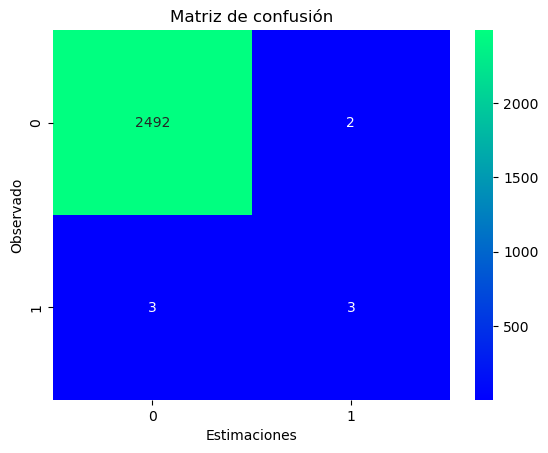

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cnf_matrix, annot=True, fmt='.0f', cmap='winter')
plt.title('Matriz de confusión')
plt.xlabel('Estimaciones')
plt.ylabel('Observado')
plt.show()

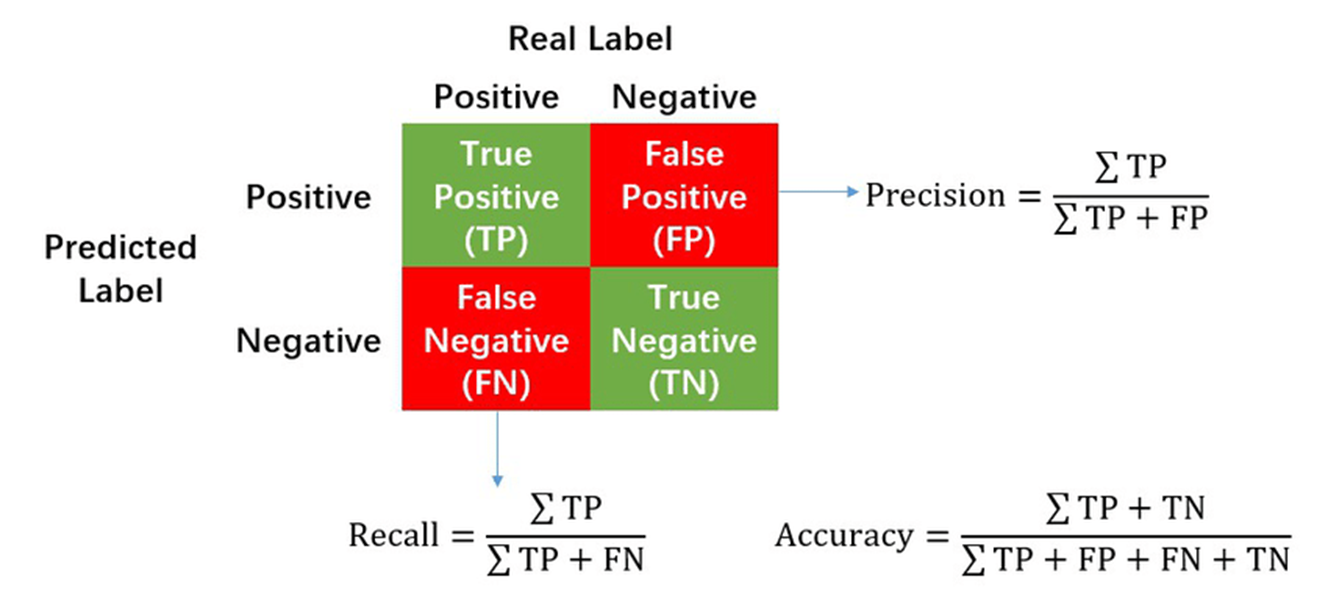

In [35]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2494
           1       0.60      0.50      0.55         6

    accuracy                           1.00      2500
   macro avg       0.80      0.75      0.77      2500
weighted avg       1.00      1.00      1.00      2500



# Críticas al modelo

- El modelo de regresión logística es muy bueno y muy usado, pero de nada sirve con un tamaño de muestra insuficiente
- Revisar el score (accuracy) es engañoso, nuestro resultado decía que nuestro modelo era muy bueno. La realidad es que el modelo tiene data insuficiente
- Por esta razón SIEMPRE revisamos la matriz de confusión y el reporte de clasificación. Ahi si tenemos todas las herramientas para evaluar un modelo de clasificación


- Para solucionar este problema, la única opción es conseguir más data.
- Cuando conseguir más data es imposible, podemos hacer:
    - Recortar datos (pero solo tendríamos 40 registros) . El objetivo es balancear la muestra
    - Remuestreo

In [36]:
data['Class'].value_counts()

0    9980
1      20
Name: Class, dtype: int64

# KNN
- Vecino más cercano

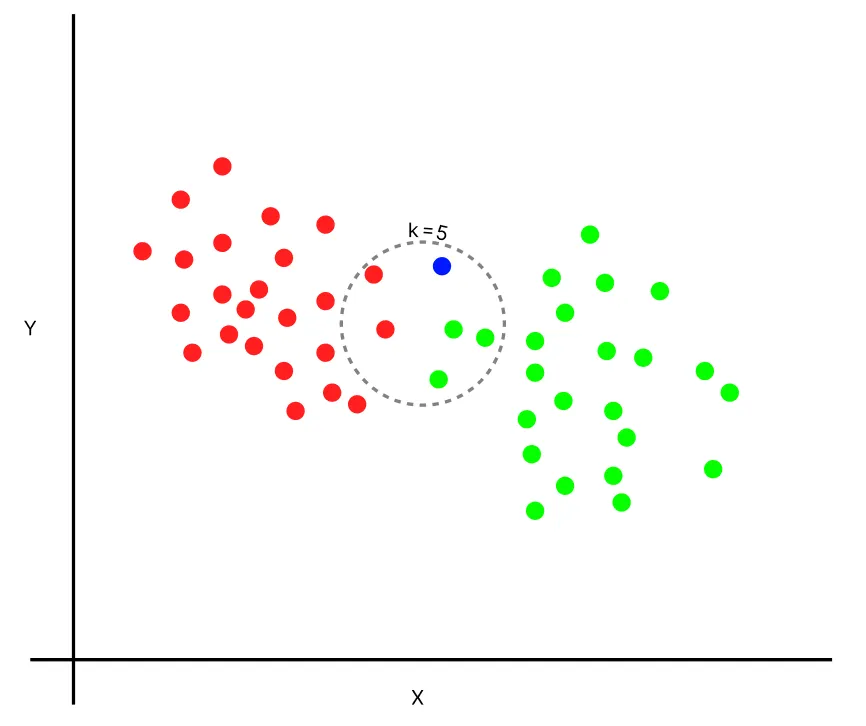

In [57]:
from sklearn.neighbors import KNeighborsClassifier

X = data.drop(columns=['Class','Time', 'Unnamed: 0'])
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1234)

modelo_knn = KNeighborsClassifier(n_neighbors=1)

modelo_knn.fit(X_train, y_train)

y_pred = modelo_knn.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cnf_matrix, annot=True, fmt='.0f', cmap='winter')
plt.title('Matriz de confusión')
plt.xlabel('Estimaciones')
plt.ylabel('Observado')
plt.show()

print(classification_report(y_test, y_pred))

AttributeError: 'Flags' object has no attribute 'c_contiguous'